In [ ]:
file_path = r'C:\Users\Z004R6UN\Downloads\archive (3)\Dataset-SA.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


In [ ]:
numeric_values = data[column].apply(pd.to_numeric, errors='coerce').dropna()


In [ ]:
column = 'product_price'

D:\anaconda\envs\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


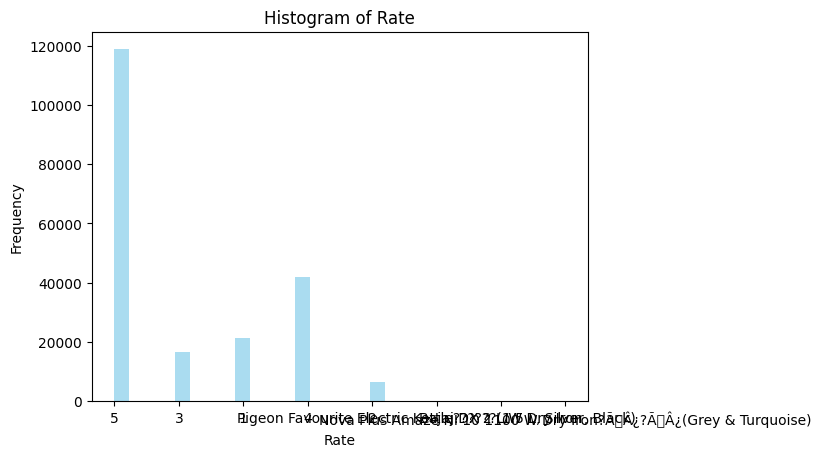

In [ ]:
plt.hist(data[column], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

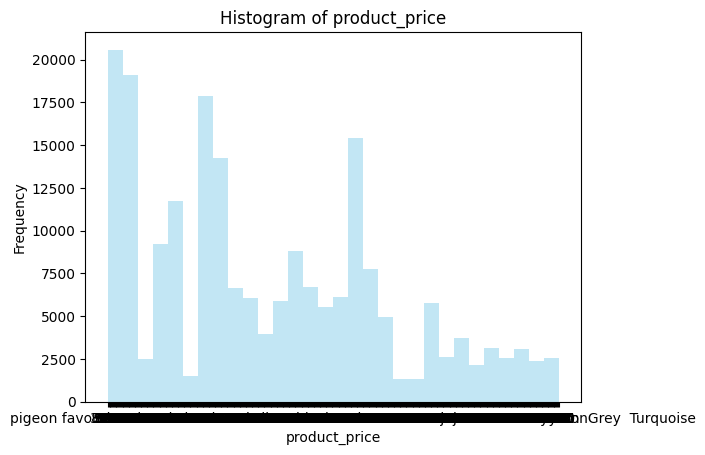

In [ ]:
plt.hist(data[column], bins=30, color='skyblue', alpha=0.5)
plt.title('Histogram of {}'.format(column))
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [ ]:
numeric_values = data[column].apply(pd.to_numeric, errors='coerce').dropna()



In [ ]:
numeric_values

0         5.0
1         5.0
2         3.0
3         1.0
4         3.0
         ... 
205047    5.0
205048    5.0
205049    3.0
205050    5.0
205051    4.0
Name: Rate, Length: 205049, dtype: float64

In [ ]:
unique_values = numeric_values.nunique()


In [ ]:
unique_values

5

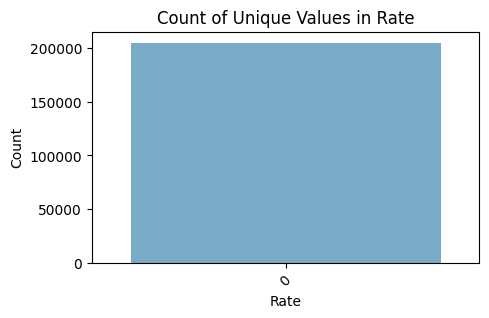

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(numeric_values, palette='Blues_r')
plt.title('Count of Unique Values in {}'.format(column))
plt.xlabel(column)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sentiment_mapping = {
    'positive': 1,
    'neg': 0,
    'neutral': 2,
    'negative': 0  # Add mapping for 'negative' sentiment label
}

In [ ]:
data['Sentiment_Numeric'] = data['Sentiment'].map(sentiment_mapping)


In [ ]:
data

,product_name,product_price,Rate,Review,Summary,Sentiment,Sentiment_Numeric
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,1
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,1
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,1
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,2
...,...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive,1
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive,1
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive,1
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


In [ ]:
pip install scikit-learn


In [ ]:
data['Review'].fillna('', inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment_Numeric'], test_size=0.2, random_state=42)


In [ ]:
count_vectorizer = CountVectorizer()


In [ ]:
X_train_counts = count_vectorizer.fit_transform(X_train)


In [ ]:
X_test_counts = count_vectorizer.transform(X_test)


In [ ]:
tfidf_transformer = TfidfTransformer()


In [ ]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [ ]:
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [ ]:
lr_model = LogisticRegression()


In [ ]:
lr_model.fit(X_train_tfidf, y_train)


D:\anaconda\envs\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test_tfidf)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8998561361585916


In [ ]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


D:\anaconda\envs\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
labels = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]


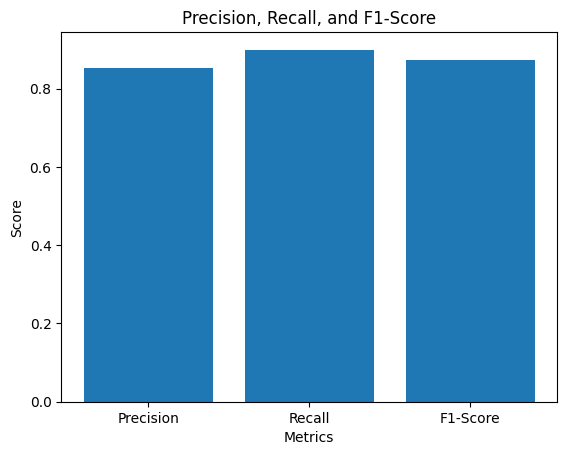

In [ ]:
plt.bar(labels, values)
plt.title('Precision, Recall, and F1-Score')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

In [ ]:
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)



Precision: 0.8533810583101065
Recall: 0.8998561361585916
F1-Score: 0.8739598468252503


In [ ]:
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm_df = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'], columns=['Negative', 'Neutral', 'Positive'])


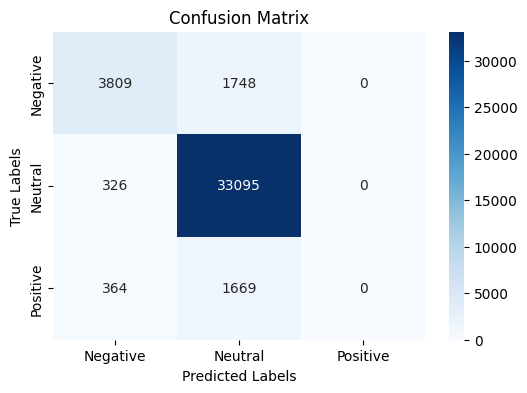

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment_Numeric'], test_size=0.2, random_state=42)


In [ ]:
count_vectorizer = CountVectorizer()


In [ ]:
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [ ]:
tfidf_transformer = TfidfTransformer()


In [ ]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
nb_model = MultinomialNB()


In [ ]:
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test_tfidf)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8965399526956183


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      5557
           1       0.90      0.99      0.94     33421
           2       0.10      0.00      0.00      2033

    accuracy                           0.90     41011
   macro avg       0.62      0.55      0.56     41011
weighted avg       0.86      0.90      0.87     41011



In [ ]:
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm_df = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'], columns=['Negative', 'Neutral', 'Positive'])


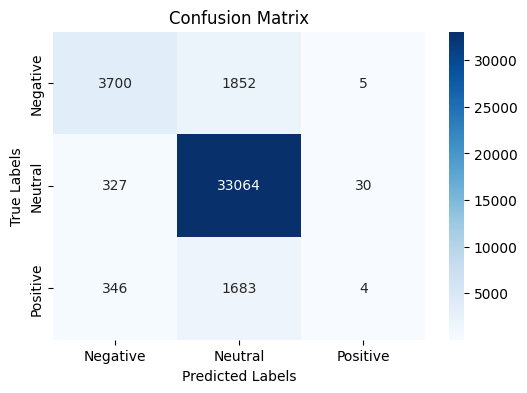

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
cm_df

,Negative,Neutral,Positive
Negative,3700,1852,5
Neutral,327,33064,30
Positive,346,1683,4


In [ ]:
$$ SVC MODEL $$ with text feature

In [ ]:
from sklearn.svm import SVC


In [ ]:
text_feature = 'Review'  # Replace with your text feature column
target = 'Sentiment'  # Replace with your target column


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[text_feature], data[target], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)


In [ ]:
X_train_tfidf

<164041x1144 sparse matrix of type '<class 'numpy.float64'>'
	with 282863 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
X_test_tfidf

<41011x1144 sparse matrix of type '<class 'numpy.float64'>'
	with 70736 stored elements in Compressed Sparse Row format>

In [ ]:
print("Training data shape:", X_train_tfidf.shape)
print("Test data shape:", X_test_tfidf.shape)

Training data shape: (164041, 1144)
Test data shape: (41011, 1144)


In [ ]:
svm_model = SVC()


In [ ]:
svm_model.fit(X_train_tfidf, y_train)


SVC()

In [ ]:
y_pred = svm_model.predict(X_test_tfidf)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8999536709663261


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.85      0.69      0.76      5557
     neutral       0.00      0.00      0.00      2033
    positive       0.91      0.99      0.95     33421

    accuracy                           0.90     41011
   macro avg       0.58      0.56      0.57     41011
weighted avg       0.85      0.90      0.87     41011



In [ ]:
cm = confusion_matrix(y_test, y_pred)


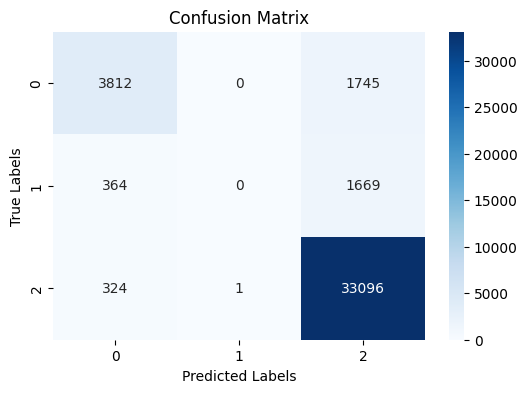

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
$ RANDOM FOREST CLASSIFICATION $ numeric features

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = data[pd.to_numeric(data['product_price'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['Rate'], errors='coerce').notnull()]

In [ ]:
data['product_price'] = data['product_price'].astype(float)  # Replace 'column1' with the appropriate column name
data['Rate'] = data['Rate'].astype(float)  # Replace 'column2' with the appropriate column name


In [ ]:
numeric_columns = ['product_price', 'Rate','Sentiment_Numeric']  # Replace with the actual column names
X = data[numeric_columns]

In [ ]:
target_column = 'Review'  # Replace with the actual target column name
y = data[target_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9168495488905145


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5478
           1       0.93      0.99      0.96     33454
           2       0.36      0.02      0.04      2078

    accuracy                           0.92     41010
   macro avg       0.71      0.61      0.61     41010
weighted avg       0.89      0.92      0.89     41010



In [ ]:
cm = confusion_matrix(y_test, y_pred)


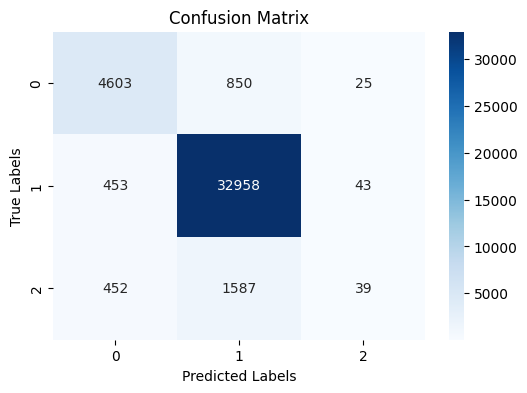

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
$$ RF text feature $$

In [ ]:
text_column = 'Review'
target_column = 'Sentiment_Numeric'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[text_column], data[target_column], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
rf_classifier.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_tfidf)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8991709339185564


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.85      0.69      0.76      5478
           1       0.91      0.99      0.95     33454
           2       0.00      0.00      0.00      2078

    accuracy                           0.90     41010
   macro avg       0.58      0.56      0.57     41010
weighted avg       0.85      0.90      0.87     41010



In [ ]:
cm = confusion_matrix(y_test, y_pred)


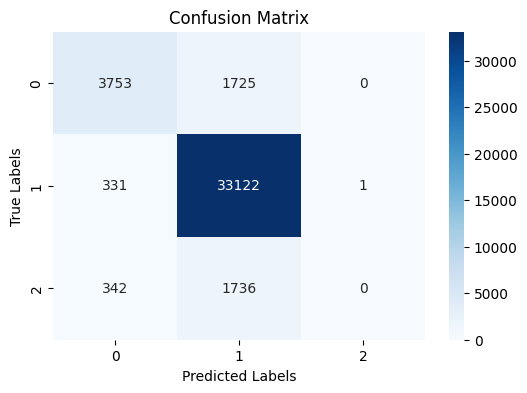

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
correlation_matrix = X.corr()


In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for features')
plt.show()